In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-fraud/transactions.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("../input/data-fraud/transactions.csv")
df = pd.DataFrame(dataset)
df.head()

,cc_num,first,last,trans_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
0,180094108369013,John,Holland,80f5177be11f0bcd768e06a0b1b294c8,2012-01-01T00:00:00.000+05:30,00:12:15,1325376735,personal_care,Hills-Boyer,64,39.011566,-119.937831,0
1,4368593032190508,Carla,Fleming,7933d389bf8ef8a11a8a301da6e6bc6c,2012-01-01T00:00:00.000+05:30,00:16:58,1325377018,gas_transport,Friesen-DAmore,133,40.149071,-75.589697,0
2,4361355512072,Matthew,Nelson,1467c318b5d73d22d6741f575db42f3f,2012-01-01T00:00:00.000+05:30,00:36:42,1325378202,entertainment,Larson-Moen,119,47.297797,-96.819362,0
3,4037295225657274,Antonio,Garcia,4a3848719d72daaa32c938ce43e0eb03,2012-01-01T00:00:00.000+05:30,00:37:59,1325378279,shopping_pos,Lynch Ltd,62,40.078781,-102.373954,0
4,4515092388857440,Timothy,Silva,02d27e94f279e1013a4c323eb8bb6811,2012-01-01T00:00:00.000+05:30,00:39:18,1325378358,shopping_pos,"Baumbach, Strosin and Nicolas",198,41.549359,-83.044403,0


In [4]:
print(df.columns)

Index(['cc_num', 'first', 'last', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'merchant', 'amt', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


In [5]:
print(len(df))
print(sum(df['is_fraud']))

13622
514


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


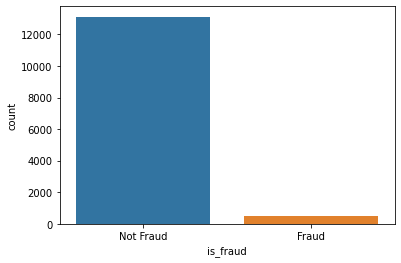

In [6]:
# visualize the target variable
g = sns.countplot(df['is_fraud'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [7]:
df2 = df[['cc_num','trans_date', 'trans_time',
       'unix_time', 'category', 'merchant', 'amt', 'merch_lat', 'merch_long',
       'is_fraud']]

In [8]:
card_list = df2['cc_num'].unique()
print(len(card_list))
print(card_list)

49
[ 180094108369013 4368593032190508    4361355512072 4037295225657274
 4515092388857440  370763211656868   38535403302699   30300776786251
  348933408404369    4006862159277    4092259246729 3526015186182660
  180036251237802    4550801576257 4354778868658084  374115112731710
 3593533875650654 6011047554247853 5590294502817012 5132731018032805
  349326734419590 5157436163845247   30170394853324 6011165671471311
 4738555317386146 5264302655249852 4765125568595799 5421885738881170
  342823590771707   30260722249657   30405027360515   30157941709315
 6011537727192499   30021746099829 3561758568398109  379684560931689
     676165681542     676331132040  341559343212109 6546851067101927
 4048725581466255 5417459284978545 4361646620879135 5157595343543285
     675985166411 4641003399120410    4483018920250 6011779269963768
 4170242670039985]


> Analysing credit card transaction for individual credit cards (unix_time vs amt)

In [9]:
df_test = [[]]*len(card_list)
for i in range(0,len(card_list)):
    df_test[i] = df2[df2['cc_num']== card_list[i]]

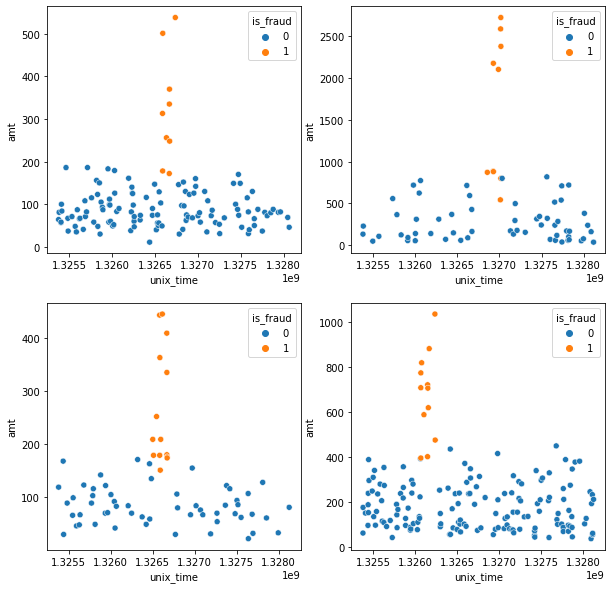

In [10]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=0
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=1
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=2
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=3
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

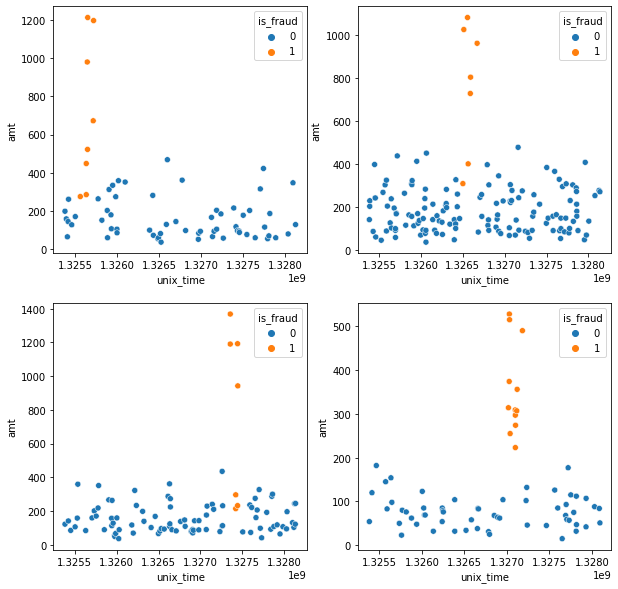

In [11]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=4
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=5
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=6
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=7
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

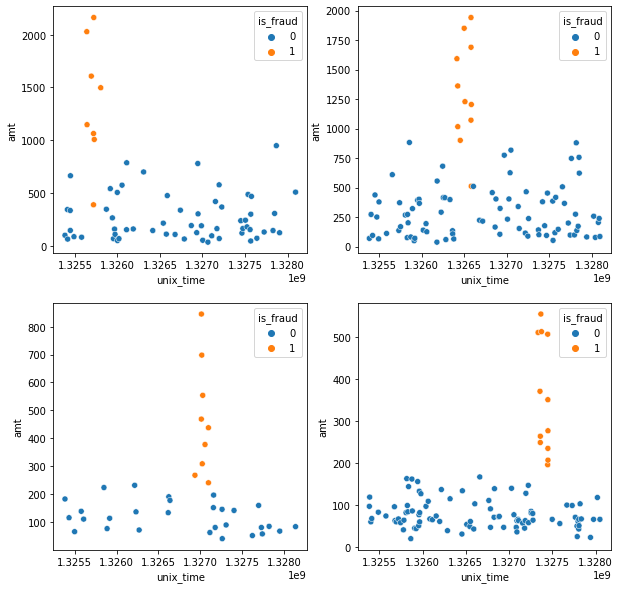

In [12]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=8
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=9
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=10
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=11
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

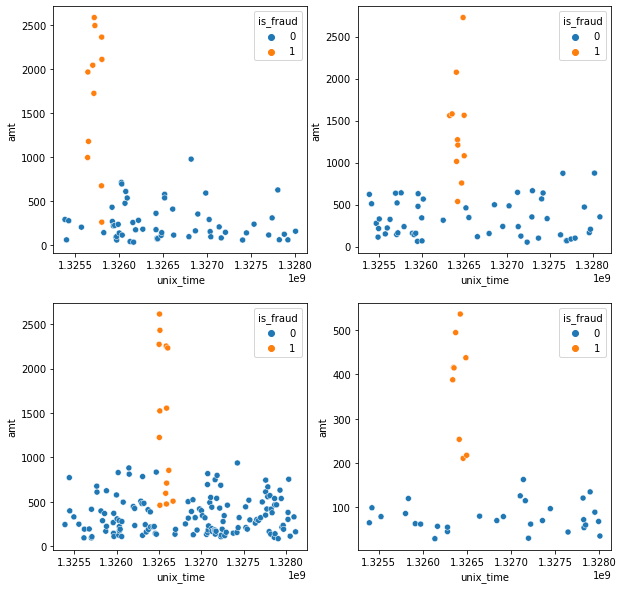

In [13]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=12
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=13
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=14
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=15
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

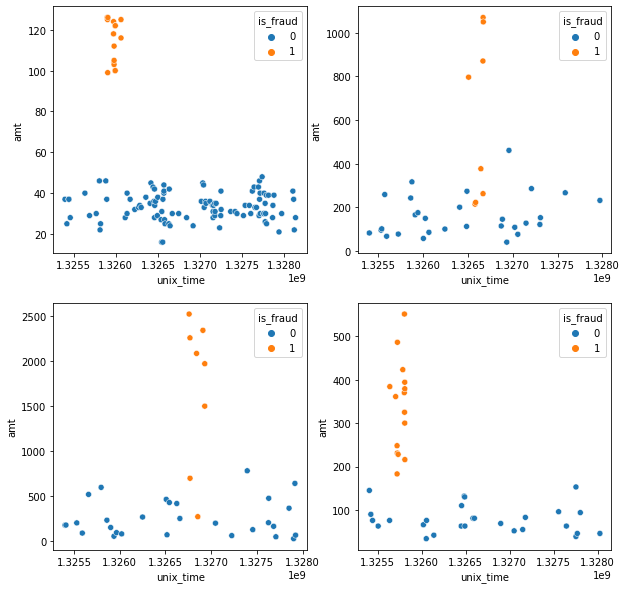

In [14]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=16
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=17
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=18
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=19
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

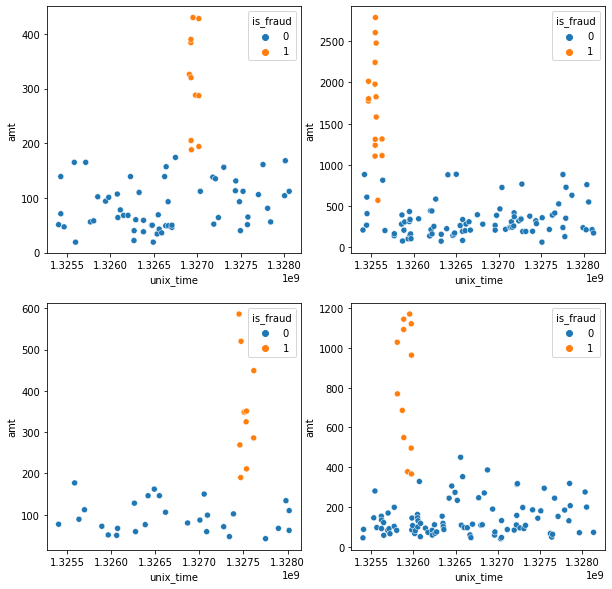

In [15]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=20
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=21
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=22
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=23
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

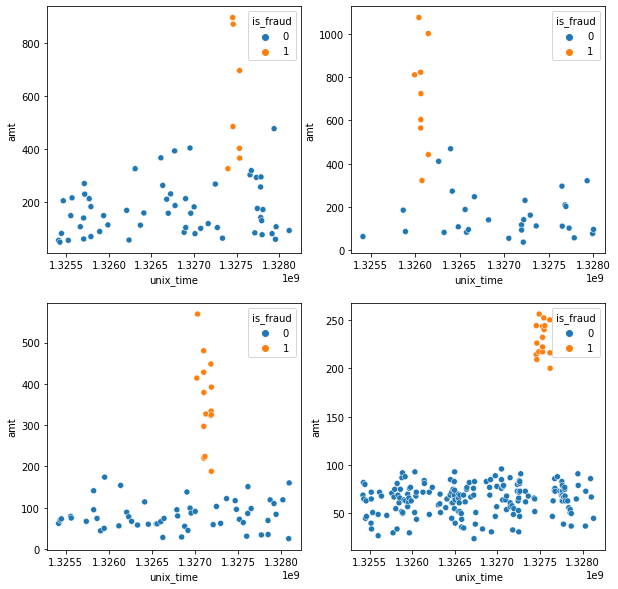

In [16]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=24
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=25
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=26
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=27
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

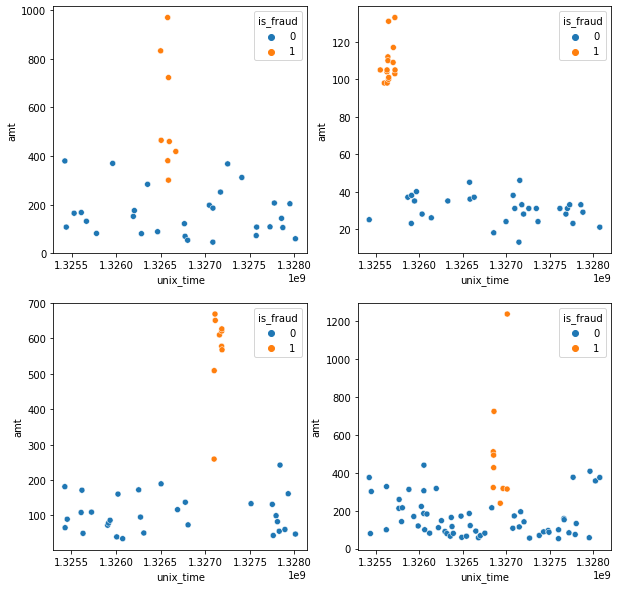

In [17]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=28
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=29
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=30
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=31
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

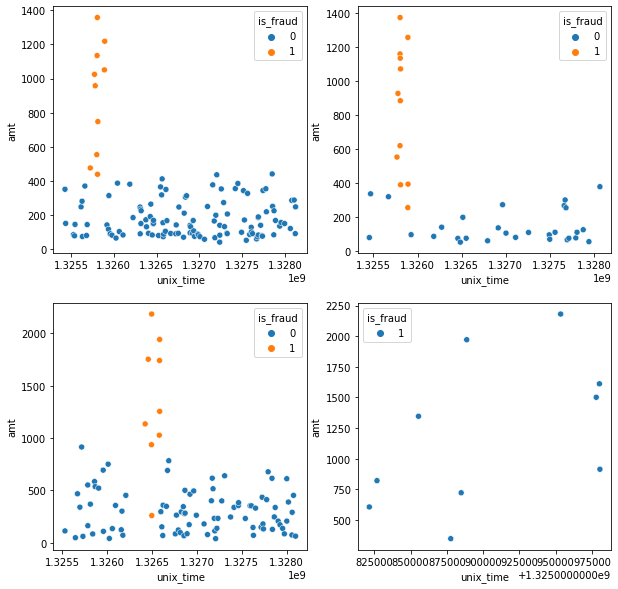

In [18]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=32
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=33
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=34
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=35
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

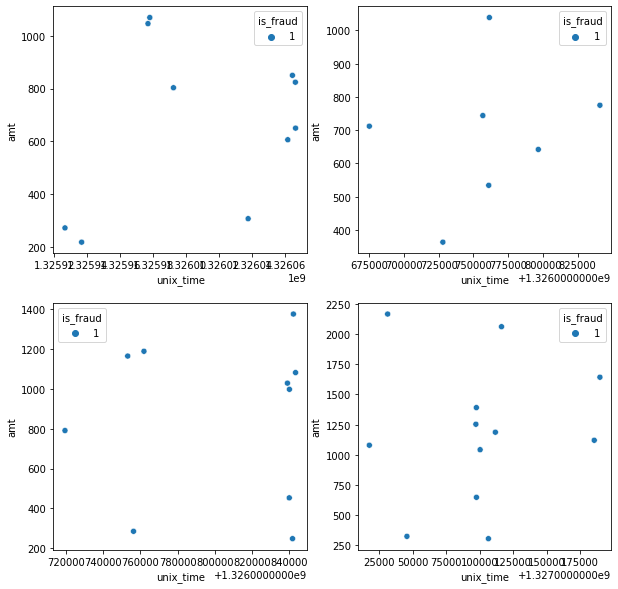

In [19]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=36
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=37
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=38
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=39
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

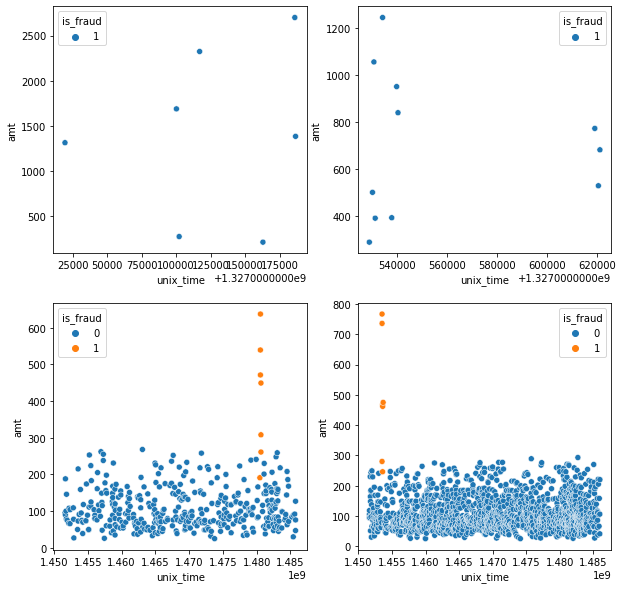

In [20]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=40
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=41
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=42
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=43
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

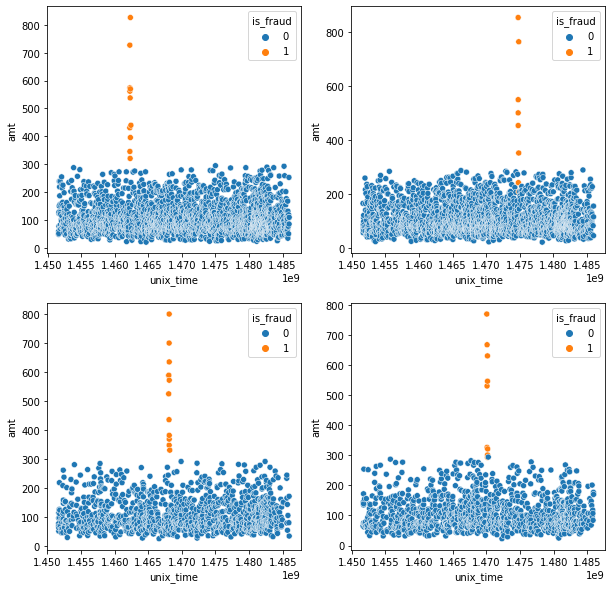

In [21]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
i=44
sns.scatterplot(ax=axs[0,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=45
sns.scatterplot(ax=axs[0,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=46
sns.scatterplot(ax=axs[1,0],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
i=47
sns.scatterplot(ax=axs[1,1],x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])
fig.show()

<AxesSubplot:xlabel='unix_time', ylabel='amt'>

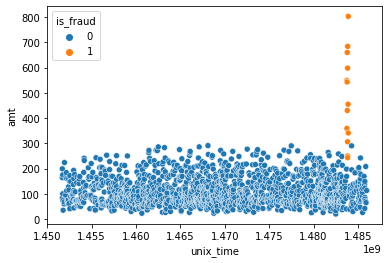

In [22]:
i=48
sns.scatterplot(x=df_test[i]['unix_time'],y=df_test[i]['amt'], hue= df_test[i]['is_fraud'])

35-41 do not show trend

In [23]:
fraud_list = card_list[35:42]
print(fraud_list)

[ 379684560931689     676165681542     676331132040  341559343212109
 6546851067101927 4048725581466255 5417459284978545]


In [24]:
len(df_test[35])
df_test[35].head(10)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
459,379684560931689,2012-01-06T00:00:00.000+05:30,03:47:21,1325821641,misc_net,"Lehner, Mosciski and King",605,41.673862,-95.644693,1
464,379684560931689,2012-01-06T00:00:00.000+05:30,05:15:07,1325826907,personal_care,"Roberts, Ryan and Smith",820,42.172025,-96.759026,1
486,379684560931689,2012-01-06T00:00:00.000+05:30,13:11:41,1325855501,shopping_net,Kozey-Boehm,1346,39.907753,-95.020888,1
513,379684560931689,2012-01-06T00:00:00.000+05:30,19:22:03,1325877723,gas_transport,"Raynor, Reinger and Hagenes",346,40.506301,-96.025746,1
523,379684560931689,2012-01-06T00:00:00.000+05:30,21:21:35,1325884895,grocery_pos,"Goldner, Kovacek and Abbott",721,40.199257,-96.064322,1
536,379684560931689,2012-01-06T00:00:00.000+05:30,22:25:14,1325888714,grocery_pos,Deckow-OConner,1971,39.966486,-96.778523,1
627,379684560931689,2012-01-07T00:00:00.000+05:30,16:23:14,1325953394,food_dining,Bahringer-Streich,2181,41.556937,-96.971414,1
684,379684560931689,2012-01-07T00:00:00.000+05:30,23:12:03,1325977923,grocery_pos,Kutch and Sons,1501,39.531853,-95.363732,1
694,379684560931689,2012-01-07T00:00:00.000+05:30,23:48:50,1325980130,shopping_net,"Stanton, Jakubowski and Baumbach",1611,41.163600,-96.948032,1
698,379684560931689,2012-01-07T00:00:00.000+05:30,23:54:28,1325980468,gas_transport,"Kutch, Hermiston and Farrell",913,42.524982,-94.994171,1


In [25]:
len(df_test[36])
df_test[36].head(10)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
586,676165681542,2012-01-07T00:00:00.000+05:30,08:56:39,1325926599,shopping_pos,"Swaniawski, Lowe and Robel",272,45.864942,-122.297378,1
594,676165681542,2012-01-07T00:00:00.000+05:30,11:44:27,1325936667,shopping_pos,Hudson-Grady,218,43.460305,-122.714836,1
680,676165681542,2012-01-07T00:00:00.000+05:30,22:54:18,1325976858,shopping_net,Fisher-Schowalter,1046,45.312792,-121.443356,1
685,676165681542,2012-01-07T00:00:00.000+05:30,23:12:44,1325977964,grocery_pos,Vandervort-Funk,1069,46.256944,-122.626672,1
709,676165681542,2012-01-08T00:00:00.000+05:30,03:11:30,1325992290,shopping_pos,Pagac LLC,803,43.952855,-124.432594,1
771,676165681542,2012-01-08T00:00:00.000+05:30,15:45:07,1326037507,home,"Durgan, Gislason and Spencer",307,44.411264,-122.670790,1
810,676165681542,2012-01-08T00:00:00.000+05:30,22:25:10,1326061510,grocery_pos,Koepp-Parker,606,45.357317,-122.056837,1
819,676165681542,2012-01-08T00:00:00.000+05:30,23:12:03,1326064323,gas_transport,Parisian and Sons,850,44.537559,-124.437646,1
826,676165681542,2012-01-08T00:00:00.000+05:30,23:41:46,1326066106,shopping_net,Mohr-Bayer,824,43.233203,-121.860898,1
827,676165681542,2012-01-08T00:00:00.000+05:30,23:43:37,1326066217,shopping_net,Jast Ltd,650,46.441407,-122.394020,1


In [26]:
len(df_test[37])
df_test[37].head(7)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
1447,676331132040,2012-01-16T00:00:00.000+05:30,00:49:48,1326674988,personal_care,Morissette-Schaefer,712,43.969822,-71.001628,1
1477,676331132040,2012-01-16T00:00:00.000+05:30,15:32:29,1326727949,shopping_net,"Little, Gutmann and Lynch",363,43.763105,-71.926927,1
1493,676331132040,2012-01-16T00:00:00.000+05:30,23:32:31,1326756751,shopping_net,Stamm-Witting,744,44.597741,-71.879616,1
1496,676331132040,2012-01-17T00:00:00.000+05:30,00:43:17,1326760997,misc_net,Brown PLC,534,45.597687,-74.346270,1
1498,676331132040,2012-01-17T00:00:00.000+05:30,00:50:50,1326761450,misc_net,Huel Ltd,1039,44.715521,-73.571486,1
1530,676331132040,2012-01-17T00:00:00.000+05:30,10:38:21,1326796701,personal_care,Erdman-Ebert,642,44.259465,-72.068871,1
1569,676331132040,2012-01-17T00:00:00.000+05:30,22:58:17,1326841097,shopping_net,Cormier LLC,775,44.361550,-72.138110,1


In [27]:
len(df_test[38])
df_test[38].head(10)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
1470,341559343212109,2012-01-16T00:00:00.000+05:30,13:11:50,1326719510,shopping_net,Price Inc,791,40.579727,-86.891201,1
1489,341559343212109,2012-01-16T00:00:00.000+05:30,22:33:30,1326753210,gas_transport,Emard Inc,1165,40.219159,-87.268591,1
1492,341559343212109,2012-01-16T00:00:00.000+05:30,23:25:40,1326756340,grocery_pos,Heidenreich PLC,285,38.374508,-88.958332,1
1499,341559343212109,2012-01-17T00:00:00.000+05:30,00:59:10,1326761950,grocery_net,Spinka-Welch,1189,40.834837,-89.120954,1
1561,341559343212109,2012-01-17T00:00:00.000+05:30,22:24:16,1326839056,grocery_pos,Bauch-Raynor,1029,38.521506,-87.676891,1
1564,341559343212109,2012-01-17T00:00:00.000+05:30,22:40:42,1326840042,shopping_net,"Labadie, Treutel and Bode",453,38.552937,-88.677281,1
1566,341559343212109,2012-01-17T00:00:00.000+05:30,22:41:58,1326840118,shopping_net,"Reichert, Rowe and Mraz",998,38.990974,-87.871855,1
1570,341559343212109,2012-01-17T00:00:00.000+05:30,23:09:48,1326841788,grocery_pos,Kunze Inc,248,38.021388,-86.344542,1
1571,341559343212109,2012-01-17T00:00:00.000+05:30,23:17:40,1326842260,grocery_pos,Bailey-Morar,1376,37.921349,-86.744044,1
1572,341559343212109,2012-01-17T00:00:00.000+05:30,23:36:55,1326843415,shopping_net,Schmidt and Sons,1082,39.810603,-88.442308,1


In [28]:
len(df_test[39])
df_test[39].head(12)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
1750,6546851067101927,2012-01-20T00:00:00.000+05:30,00:03:00,1327017780,misc_net,Kris-Weimann,1079,42.279628,-90.472309,1
1766,6546851067101927,2012-01-20T00:00:00.000+05:30,03:50:16,1327031416,shopping_pos,Denesik and Sons,2167,40.084791,-88.664261,1
1781,6546851067101927,2012-01-20T00:00:00.000+05:30,07:50:21,1327045821,shopping_pos,Beier-Hyatt,323,42.039097,-90.251652,1
1843,6546851067101927,2012-01-20T00:00:00.000+05:30,22:07:32,1327097252,grocery_pos,"Lockman, West and Runte",1253,39.431488,-88.495771,1
1844,6546851067101927,2012-01-20T00:00:00.000+05:30,22:13:31,1327097611,shopping_net,Rempel Inc,1391,41.811978,-90.087973,1
1845,6546851067101927,2012-01-20T00:00:00.000+05:30,22:14:37,1327097677,shopping_pos,"Daugherty, Pouros and Beahan",647,39.150985,-90.516880,1
1855,6546851067101927,2012-01-20T00:00:00.000+05:30,23:00:15,1327100415,grocery_pos,"Osinski, Ledner and Leuschke",1042,40.497948,-89.933054,1
1866,6546851067101927,2012-01-21T00:00:00.000+05:30,00:43:35,1327106615,shopping_pos,Beier-Hyatt,304,40.103495,-89.172431,1
1872,6546851067101927,2012-01-21T00:00:00.000+05:30,02:10:00,1327111800,shopping_pos,"Nitzsche, Kessler and Wolff",1187,39.521735,-88.006452,1
1878,6546851067101927,2012-01-21T00:00:00.000+05:30,03:26:10,1327116370,shopping_pos,Lesch Ltd,2062,40.428447,-88.053364,1


In [29]:
len(df_test[40])
df_test[40].head(7)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
1752,4048725581466255,2012-01-20T00:00:00.000+05:30,00:28:44,1327019324,misc_net,Kris-Weimann,1314,41.251163,-86.331979,1
1852,4048725581466255,2012-01-20T00:00:00.000+05:30,22:56:35,1327100195,shopping_net,Mohr-Bayer,1688,41.934204,-89.154545,1
1857,4048725581466255,2012-01-20T00:00:00.000+05:30,23:29:31,1327102171,shopping_net,"Altenwerth, Cartwright and Koss",275,41.650259,-87.080535,1
1881,4048725581466255,2012-01-21T00:00:00.000+05:30,03:37:06,1327117026,shopping_pos,"Goyette, Howell and Collier",2323,41.930135,-86.367812,1
1937,4048725581466255,2012-01-21T00:00:00.000+05:30,16:22:37,1327162957,grocery_pos,Cartwright-Harris,213,42.959636,-86.647456,1
1983,4048725581466255,2012-01-21T00:00:00.000+05:30,22:48:19,1327186099,shopping_net,"Reichert, Rowe and Mraz",2699,43.009733,-88.239351,1
1984,4048725581466255,2012-01-21T00:00:00.000+05:30,22:57:14,1327186634,entertainment,"Welch, Rath and Koepp",1384,41.100244,-85.987183,1


In [30]:
len(df_test[41])
df_test[41].head(11)

,cc_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
2293,5417459284978545,2012-01-25T00:00:00.000+05:30,22:00:54,1327528854,gas_transport,"Schaefer, McGlynn and Bosco",290,42.917006,-76.179649,1
2297,5417459284978545,2012-01-25T00:00:00.000+05:30,22:21:56,1327530116,grocery_pos,Koepp-Witting,502,41.531437,-79.028405,1
2300,5417459284978545,2012-01-25T00:00:00.000+05:30,22:31:23,1327530683,grocery_pos,Murray-Smitham,1057,43.003885,-76.795875,1
2301,5417459284978545,2012-01-25T00:00:00.000+05:30,22:40:00,1327531200,grocery_pos,"Kovacek, Dibbert and Ondricka",392,43.929969,-77.843901,1
2305,5417459284978545,2012-01-25T00:00:00.000+05:30,23:29:30,1327534170,misc_pos,McCullough LLC,1246,42.325479,-77.045865,1
2311,5417459284978545,2012-01-26T00:00:00.000+05:30,00:30:30,1327537830,misc_net,Kuhn LLC,394,41.900491,-77.330969,1
2313,5417459284978545,2012-01-26T00:00:00.000+05:30,01:03:19,1327539799,misc_net,Flatley-Durgan,952,44.453934,-78.792145,1
2314,5417459284978545,2012-01-26T00:00:00.000+05:30,01:12:23,1327540343,grocery_net,Bahringer-Larson,841,41.334989,-76.082994,1
2384,5417459284978545,2012-01-26T00:00:00.000+05:30,23:07:44,1327619264,grocery_pos,OKeefe-Hudson,774,43.843854,-78.761845,1
2386,5417459284978545,2012-01-26T00:00:00.000+05:30,23:31:41,1327620701,grocery_pos,Stracke-Lemke,530,41.698347,-79.291538,1


In [31]:
df.loc[[459,586,1447,1470,1750,1752,2293]]

,cc_num,first,last,trans_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
459,379684560931689,Cindy,Martin,e1ea0568f0fb067d02a9f4ca259a1f67,2012-01-06T00:00:00.000+05:30,03:47:21,1325821641,misc_net,"Lehner, Mosciski and King",605,41.673862,-95.644693,1
586,676165681542,John,Garcia,fad8536beeed1c640bbb3f815d6b4d15,2012-01-07T00:00:00.000+05:30,08:56:39,1325926599,shopping_pos,"Swaniawski, Lowe and Robel",272,45.864942,-122.297378,1
1447,676331132040,Jonathan,Flores,5fbc6277b99b69d95c1771ae42d14129,2012-01-16T00:00:00.000+05:30,00:49:48,1326674988,personal_care,Morissette-Schaefer,712,43.969822,-71.001628,1
1470,341559343212109,Nathaniel,Wiggins,f8d6f337d4af4101fd4785efd98bfe64,2012-01-16T00:00:00.000+05:30,13:11:50,1326719510,shopping_net,Price Inc,791,40.579727,-86.891201,1
1750,6546851067101927,Brianna,Mercer,253ac718db97f624853153950b047d92,2012-01-20T00:00:00.000+05:30,00:03:00,1327017780,misc_net,Kris-Weimann,1079,42.279628,-90.472309,1
1752,4048725581466255,Theresa,Cole,afc28cb7778743294fe3491f62d930b3,2012-01-20T00:00:00.000+05:30,00:28:44,1327019324,misc_net,Kris-Weimann,1314,41.251163,-86.331979,1
2293,5417459284978545,Angel,Smith,70e63ec9b17cc6288571cb2ed7424bd5,2012-01-25T00:00:00.000+05:30,22:00:54,1327528854,gas_transport,"Schaefer, McGlynn and Bosco",290,42.917006,-76.179649,1
